In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
ratio = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'ratio')
time = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'time')

# Auto-membership function population is possible with .automf(3, 5, or 7)
ratio.automf(3)
time.automf(3)

C:\Users\Urja\Anaconda3\envs\py27\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


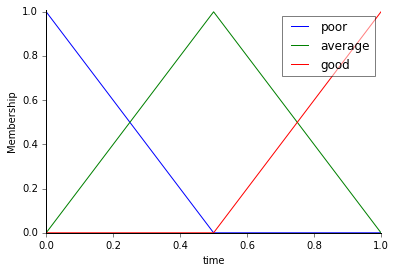

In [2]:
time.view()

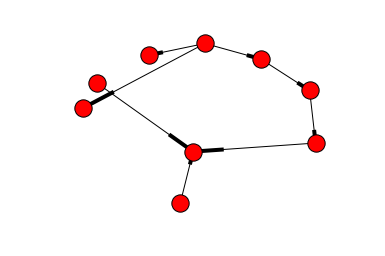

In [3]:
rule1 = ctrl.Rule(ratio['poor'], time['good'])
rule2 = ctrl.Rule(ratio['average'], time['average'])
rule3 = ctrl.Rule(ratio['good'], time['poor'])

rule1.view()

0.166666666667


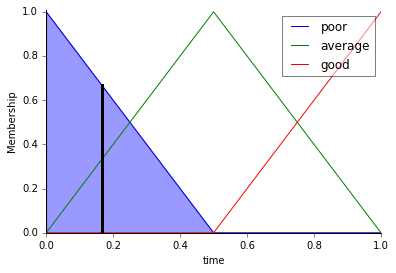

In [4]:
time_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
timing = ctrl.ControlSystemSimulation(time_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
timing.input['ratio'] = 2

# Crunch the numbers
timing.compute()
print timing.output['time']
time.view(sim=timing)